MSE is the loss function, the adam optimizer, and the additional metric accuracy.

Fit the model with the training data, using 100 epochs.

Plot the model’s loss function and accuracy over the 100 epochs.

Evaluate the model using testing data and the evaluate method.
Using one hidden layer with 10 nodes on it.

In [1]:
import pandas as pd
from path import Path
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from datetime import datetime

%matplotlib inline

In [2]:
# Read the kc_house_data.csv file from the Resources folder into a Pandas DataFrame
hp_df = pd.read_csv(
    Path("./Resources/kc_house_data.csv")
)

# Review the DataFrame
hp_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# Define features set X by selecting all columns but id, price, date,zipcode
X = hp_df.drop(columns=["id","price","date","lat","long"]).copy()

# Display the features DataFrame
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503


In [4]:
# Define target set by selecting the price column
y = hp_df["price"]

# Display a sample of y
y[:5]

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [5]:
# Create training and testing datasets using train_test_split
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [6]:
# Create the StandardScaler instance
X_scaler = StandardScaler()

In [7]:
# Fit the scaler to the features training dataset
X_scaler.fit(X_train)

StandardScaler()

In [8]:
# Scale both the training and testing data from the features dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:

# Define the model - deep neural net with two hidden layers
number_inputs = 16
# Define the number of hidden nodes for the model
number_hidden_nodes = 12

# Create the Sequential model instance
neuron = Sequential()

# Add a Dense layer specifying the number of inputs, the number of hidden nodes, and the activation function
neuron.add(Dense(units=number_hidden_nodes, input_dim=number_inputs, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
neuron.add(Dense(1, activation="linear"))


In [10]:
# Display the Sequential model summary
neuron.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                204       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 217
Trainable params: 217
Non-trainable params: 0
_________________________________________________________________


In [12]:
##### Compile the Sequential model
neuron.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

In [ ]:
# Fit the model using 1000 epochs and the training data
model = neuron.fit(X_train_scaled, y_train, epochs=10000)

Epoch 1/10000
507/507 [==============================] - 1s 1ms/step - loss: 415117180928.0000 - mse: 415117180928.0000
Epoch 2/10000
507/507 [==============================] - 1s 1ms/step - loss: 415076057088.0000 - mse: 415076057088.0000
Epoch 3/10000
507/507 [==============================] - 1s 1ms/step - loss: 414985224192.0000 - mse: 414985224192.0000
Epoch 4/10000
507/507 [==============================] - 1s 1ms/step - loss: 414851694592.0000 - mse: 414851694592.0000
Epoch 5/10000
507/507 [==============================] - 1s 1ms/step - loss: 414682841088.0000 - mse: 414682841088.0000
Epoch 6/10000
507/507 [==============================] - 1s 1ms/step - loss: 414483021824.0000 - mse: 414483021824.0000A: 0s - loss: 411965915136.0000 - mse: 4119659151
Epoch 7/10000
507/507 [==============================] - 1s 1ms/step - loss: 414255841280.0000 - mse: 414255841280.0000
Epoch 8/10000
507/507 [==============================] - 1s 1ms/step - loss: 414003036160.0000 - mse: 414003036

In [14]:
# Create a DataFrame using the model history and an index parameter
model_plot = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))

<AxesSubplot:>

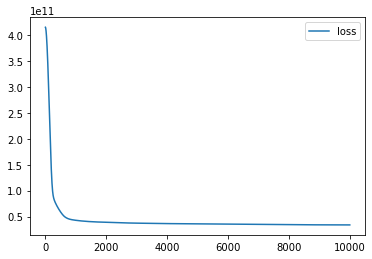

In [15]:
# Vizualize the model plot where the y-axis displays the loss metric
model_plot.plot(y="loss")

In [19]:
neuron.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                204       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 217
Trainable params: 217
Non-trainable params: 0
_________________________________________________________________


In [22]:
y_pred = neuron.predict(X_test_scaled)

In [23]:
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))

Mean Absolute Error: 125986.25


In [24]:
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_pred)))

Variance score is: 0.74


In [25]:
hp_df['price'].mean()

540088.1417665294

In [27]:
# Set the model's file path
file_path = Path("Resources/house_price_prediction_Model1.h5")

# Export your model to an HDF5 file
neuron.save(file_path)
